In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Recursos de NLTK
# nltk.download('punkt')
# nltk.download('stopwords')

# nltk.download('wordnet')  # necesario para WordNetLemmatizer


In [2]:
path_file_codebook = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Codebook - Feminism and Anti-feminism.xlsx"

df_codebook = pd.read_excel(path_file_codebook)

df_codebook.head()

,ID,Code,Definition,Survey question / comments,Category,Sub-category,Feminism Stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues


In [3]:
df_codebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          48 non-null     int64 
 1   Code                        48 non-null     object
 2   Definition                  29 non-null     object
 3   Survey question / comments  21 non-null     object
 4   Category                    48 non-null     object
 5   Sub-category                28 non-null     object
 6   Feminism Stance             48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [4]:
df_codebook.shape

(48, 7)

In [5]:
# Convert column names to lowercase and replace characters

df_codebook.columns = df_codebook.columns.str.lower()
df_codebook.columns = df_codebook.columns.str.replace(' / ', '_').str.replace(' ', '_').str.replace('-', '_')
df_codebook = df_codebook.rename(columns={'survey_question_comments': 'comments'})


df_codebook.head(2)

,id,code,definition,comments,category,sub_category,feminism_stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism


In [6]:
df_codebook.describe(exclude='number').T.sort_values(by = 'freq', ascending=False)

,count,unique,top,freq
category,48,5,Non-related content,19
sub_category,28,3,Latent,17
feminism_stance,48,12,Content niche,17
code,48,48,Equating feminism and machismo,1
definition,29,29,"They do not deny discrimination against women,...",1
comments,21,21,"""Tan peligroso es el machismo como el feminism...",1


Insights Clave
Comenzando con la subcategoría, el valor que más se repite es "latente." Esta subcategoría se desprende directamente de la categoría y hace referencia a si la postura es feminista, antifeminista, explícita, neutra o latente, lo que implica que las opiniones sobre el feminismo pueden estar presentes sin ser expresadas de forma directa.

En el análisis, observamos que hay una predominancia de críticas latentes al feminismo, principalmente relacionadas con el antifeminismo. Muchas de estas críticas no se expresan de forma directa. Por otro lado, también hay comentarios latentes que apoyan el feminismo, aunque en menor proporción.El análisis muestra que en la subcategoría "Latent," hay un total de 28 comentarios, de los cuales 17 son antifeministas. Esto sugiere que, aunque hay críticas al feminismo, muchas de ellas no se expresan de manera directa, lo que podría indicar una resistencia social a abordar estos temas explícitamente.

Por último, otro valor que llama la atención es el de "feminism_stance," donde se clasifica como Content niche con 17 comentarios (lo que representa el 35.4% del total de 48). Es importante señalar que toda la fila que contiene esta información incluye valores como definition, survey_question_comments, category, y sub_category que se relacionan con Non-related content, lo que implica que los comentarios dentro de esta categoría pueden no estar directamente vinculados a posturas claras sobre el feminismo o el antifeminismo.

In [7]:
df_codebook['category'].unique()

array(['Antifeminism', 'Neutral', 'Feminism', 'Non-related content',
       'No content'], dtype=object)

In [8]:
df_codebook[df_codebook['sub_category'] == 'Latent'][['category', 'sub_category', 'feminism_stance']]


,category,sub_category,feminism_stance
2,Antifeminism,Latent,Opposing feminist issues
3,Antifeminism,Latent,Opposing feminist issues
4,Antifeminism,Latent,Opposing feminist issues
5,Antifeminism,Latent,Opposing feminist issues
6,Antifeminism,Latent,Opposing feminist issues
10,Antifeminism,Latent,Opposing feminist issues
11,Antifeminism,Latent,Opposing feminist issues
12,Antifeminism,Latent,Opposing feminist issues
13,Antifeminism,Latent,Content expressing opinions or behaviors of a ...
16,Antifeminism,Latent,Opposing feminist issues


In [9]:
df_codebook[df_codebook['feminism_stance'] == 'Content niche']
#[['category', 'sub_category', 'feminism_stance']]


,id,code,definition,comments,category,sub_category,feminism_stance
28,30,Videogames,NaN,NaN,Non-related content,NaN,Content niche
29,31,Beauty,NaN,NaN,Non-related content,NaN,Content niche
30,32,Lifestyle (IRL),NaN,NaN,Non-related content,NaN,Content niche
31,33,Fitness,NaN,NaN,Non-related content,NaN,Content niche
32,34,Movies and TV Shows,NaN,NaN,Non-related content,NaN,Content niche
33,35,Music,NaN,NaN,Non-related content,NaN,Content niche
34,36,Humour,NaN,NaN,Non-related content,NaN,Content niche
35,37,Animals,NaN,NaN,Non-related content,NaN,Content niche
36,38,Cooking,NaN,NaN,Non-related content,NaN,Content niche
37,39,Coaching,NaN,NaN,Non-related content,NaN,Content niche


In [10]:
#"Content niche" caught my attention: 

df_codebook['feminism_stance'].unique()

array(['Strongly opposing feminism', 'Moderatedly opposing feminism',
       'Opposing feminist issues',
       'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n',
       'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.',
       'Strongly supporting feminism', 'Supporting feminist issues',
       'Suporting feminist issues', 'Content niche',
       'Content characteristics', 'Content format',
       'No content of any type during the week'], dtype=object)

To provide visual insights, I decided to unify the following two labels into one: 'Content expressing opinions or behaviors of a sexist or anti-feminist nature, but the content does not directly address the feminism-antifeminism debate,' and 'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti-feminist nature, but the content does not directly address the feminism-antifeminism debate.' The new label is 'Sexist Content without Debate'

In [11]:
# Crear un nuevo DataFrame con las etiquetas unificadas
visual_df_codebook = df_codebook.copy()  # Hacer una copia del DataFrame original
visual_df_codebook['feminism_stance'] = visual_df_codebook['feminism_stance'].replace({
    'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n':
    'Sexist Content without Debate',
    
    'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.': 
    'Sexist Content without Debate'
})
visual_df_codebook.head()

,id,code,definition,comments,category,sub_category,feminism_stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues


C:\Users\Celeste\AppData\Local\Temp\ipykernel_1104\3750089958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(visual_df_codebook,


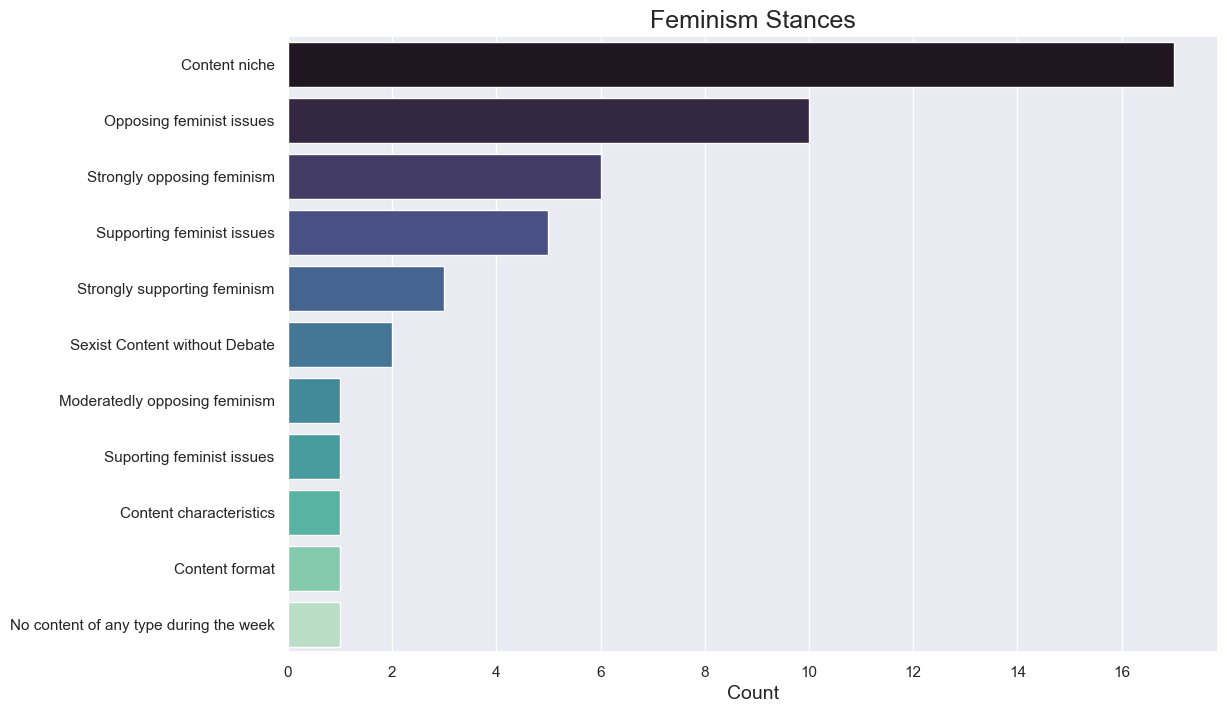

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

sns.countplot(visual_df_codebook,
              y="feminism_stance", 
              order = visual_df_codebook['feminism_stance'].value_counts().index, 
              palette='mako', 
              ) 

plt.title("Feminism Stances", fontsize=18)
plt.xlabel("Count", fontsize=14)
plt.ylabel("")
plt.show()

Preprocessing

In [13]:
#eliminar???    FLOW
# #sentiment count = category

df_codebook['category'].notna().value_counts()
df_codebook['category'].value_counts()

#not balanced! 

category
Non-related content    19
Antifeminism           18
Feminism                9
Neutral                 1
No content              1
Name: count, dtype: int64

In [14]:
nan_count = df_codebook['comments'].isna().sum()
non_nan_count = df_codebook['comments'].notna().sum()

print(f"Valores NaN: {nan_count}")
print(f"Valores no NaN: {non_nan_count}")

Valores NaN: 27
Valores no NaN: 21


## Sobre el análisis de sentimientos:

Diferencias entre lo que ya tienes y un análisis de sentimientos:
Lo que ya tienes (category): Indica el tema o la postura general del comentario (si es feminista, antifeminista, neutral, etc.).

### Análisis de sentimiento: Determina si el tono emocional del comentario es positivo, negativo o neutro. Podrías encontrar, por ejemplo, que dentro de la categoría 'Feminism' haya comentarios con sentimientos negativos (críticas a la implementación del feminismo) o positivos (apoyo entusiasta).

### ¿Qué podrías hacer?
Ver si es necesario un análisis de sentimientos: Pregúntate si te interesaría medir el tono emocional de los comentarios además de su clasificación temática. Esto podría agregar una capa más rica de análisis, por ejemplo, mostrando qué porcentaje de los comentarios feministas son positivos o negativos en tono.

## Próximos pasos para un análisis de sentimiento:

Si decides realizar este análisis, podrías aplicar una herramienta de análisis de sentimiento a la columna survey_question_comments.
Luego, podrías cruzar los resultados con la columna category para ver cómo se distribuyen los sentimientos dentro de cada categoría (Feminism, Antifeminism, etc.).


### ¿Es suficiente esta distribución?
Para las categorías principales (Antifeminism y Feminism), tienes una cantidad razonable de datos, aunque la categoría "Feminism" tiene aproximadamente la mitad de entradas que "Antifeminism". Podría ser suficiente para sacar conclusiones preliminares, pero el desequilibrio podría influir en el análisis.


Si decides hacer el análisis de sentimientos, podrías ver si hay matices dentro de las categorías Feminism y Antifeminism. Aunque la cantidad no es enorme, 18 y 9 comentarios pueden darte algunas tendencias sobre el tono (positivo, negativo o neutral) en cada categoría.

## Propuesta:
Realizar el análisis de sentimiento sobre las categorías principales (Feminism y Antifeminism).
Ver cómo se distribuyen los comentarios positivos, negativos o neutros en cada una.
Descartar o tratar con cuidado las categorías que tienen solo 1 entrada, ya que no proporcionarían insights significativos.


In [15]:
# I took this next idea from: 

# https://www.kaggle.com/code/ankumagawa/sentimental-analysis-using-naive-bayes-classifier#3.-SENTIMENTAL-ANALYSIS:

df_codebook['feminism_stance'].unique()

array(['Strongly opposing feminism', 'Moderatedly opposing feminism',
       'Opposing feminist issues',
       'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n',
       'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.',
       'Strongly supporting feminism', 'Supporting feminist issues',
       'Suporting feminist issues', 'Content niche',
       'Content characteristics', 'Content format',
       'No content of any type during the week'], dtype=object)

In [16]:
# Unify values in column 'feminism_stance'
df_codebook['feminism_stance'] = df_codebook['feminism_stance'].replace('Suporting feminist issues', 'Supporting feminist issues')

(-0.5, 799.5, 399.5, -0.5)

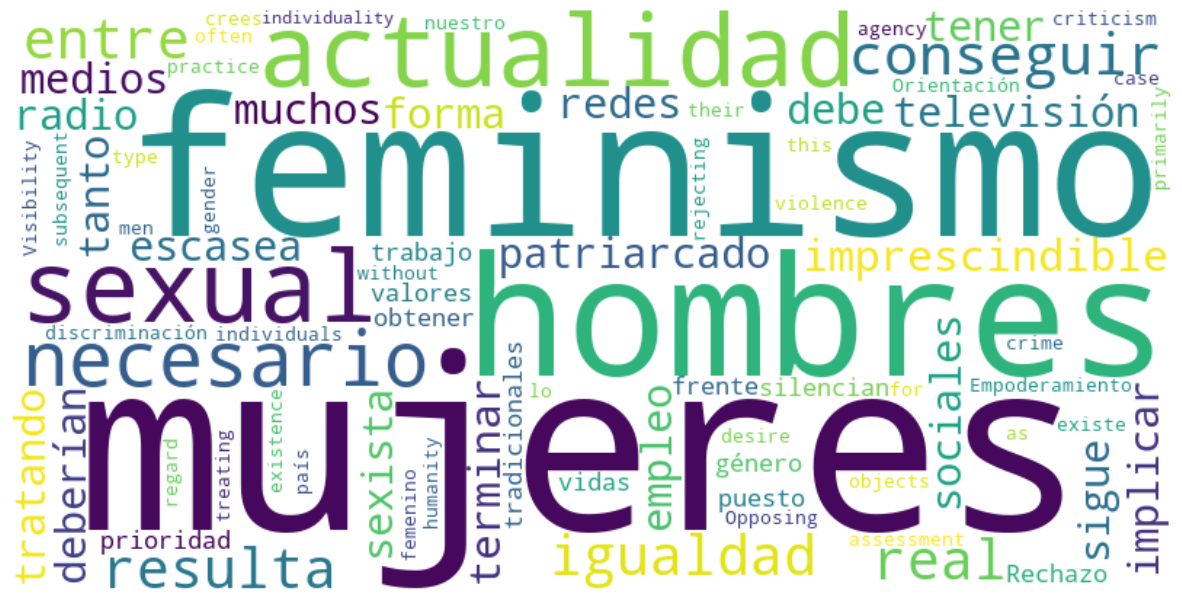

In [17]:
# Define positive stances
positive_stances = ['Strongly supporting feminism', 'Supporting feminist issues']

# Join comments for positive stances
text = " ".join(i for i in df_codebook[df_codebook['feminism_stance'].isin(positive_stances)]['comments'])

stopwords = set(['the', 'or', 'by','and','y', 'o', 'que', 'de', 'la', 'el', 'El', 'en', 'a', 'los', 'las', 'por', 'un', 'una', \
                 'con', 'su', 'se', 'del', 'es', 'no', 'para', 'más', 'este', 'esto', 'como','este', 'P22', 'tan',\
                      'donde', 'cuando', 'que', 'quien', 'mi', 'me', 'te', 'su', 'mismo', 'también', 'ser', 'hay', 'of'])

wordcloud = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(text)

# Plott the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# What are people discussing? Topics with significant impact. Still a reality, still a patriarchy.

(-0.5, 799.5, 399.5, -0.5)

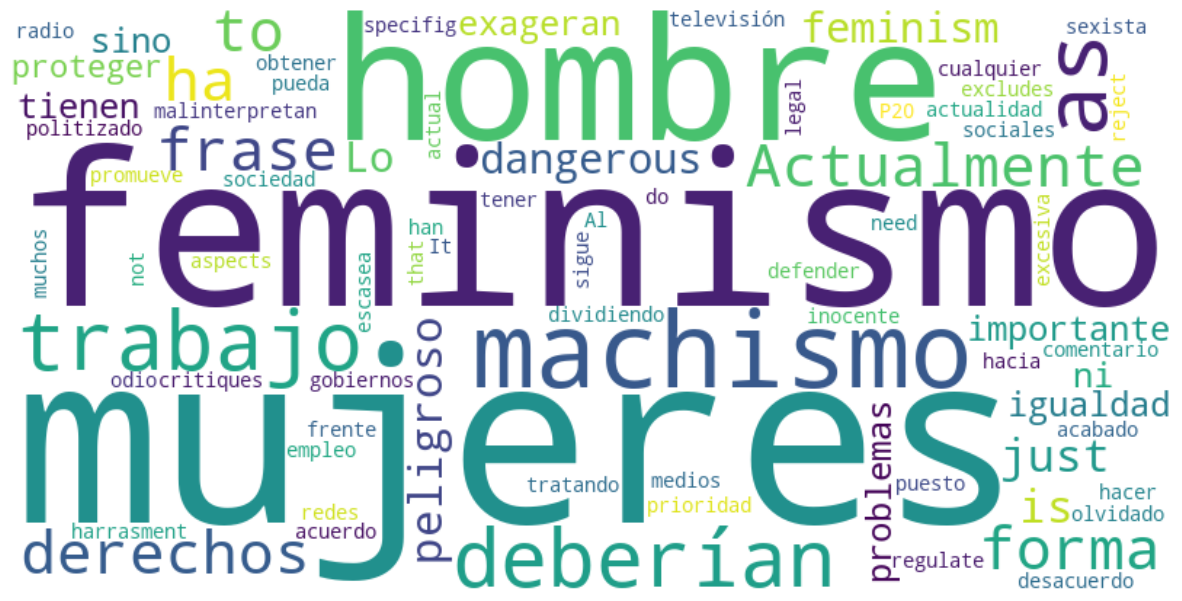

In [18]:
negative_stances = ['Strongly opposing feminism', 'Moderatedly opposing feminism', 'Opposing feminist issues',\
                    'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n',\
                    'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.']

text = " ".join(i for i in df_codebook[df_codebook['feminism_stance'].isin(negative_stances)]['comments'] if pd.notna(i))

wordcloud = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


Tienes razón en que podría parecer redundante aplicar el conjunto de stopwords para las word clouds y luego hacer un análisis de sentimiento donde también podrían influir las stopwords. Sin embargo, cada una tiene un propósito distinto:

Word Cloud: Se enfoca en la frecuencia de palabras, por lo que es importante eliminar las stopwords que no aportan significado (como "the", "and", etc.) para resaltar las palabras clave que representan el tema de la discusión.

Análisis de Sentimiento: El análisis de sentimiento, por otro lado, se basa en el tono emocional del texto y no solo en la frecuencia. Las stopwords pueden ser menos relevantes aquí, pero tampoco necesariamente tienes que eliminarlas para este análisis, ya que herramientas como TextBlob o VADER ya tienen en cuenta el contexto y suelen funcionar bien sin eliminación de stopwords.

¿Qué puedes hacer?
Para la Word Cloud: Usa el conjunto de stopwords para eliminar palabras irrelevantes y obtener una mejor visualización de las palabras clave.
Para el Análisis de Sentimiento: No es necesario eliminar stopwords, ya que los algoritmos de análisis de sentimiento suelen gestionarlas bien. Además, no quieres eliminar palabras que puedan ser relevantes para determinar el sentimiento (como "no", "si", "muy", etc.).
Conclusión: No es realmente trabajo redundante, ya que los objetivos de ambos enfoques son distintos. Las word clouds ayudan a explorar los temas, mientras que el análisis de sentimiento mide el tono.

# focus: qué porcentaje de los comentarios feministas son positivos o negativos en tono. survey


In [19]:
import spacy
spacy_nlp = spacy.load("es_core_news_sm")

In [20]:
df_sentiment_analysis = df_codebook[['id', 'comments', 'category', 'sub_category']].copy()

df_sentiment_analysis.head()

,id,comments,category,sub_category
0,1,"""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit
1,2,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit
2,3,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent
3,4,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent
4,5,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent


In [21]:
df_sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            48 non-null     int64 
 1   comments      21 non-null     object
 2   category      48 non-null     object
 3   sub_category  28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [22]:
# Eliminar filas donde 'comments' es NaN
df_sentiment_analysis = df_sentiment_analysis.dropna(subset=['comments'])

df_sentiment_analysis.shape

(21, 4)

In [23]:
REPLACE_NO_SPACE = re.compile(r"[.;:!\'¿?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

def my_clean_text(comments):

    #remove special characters
    comments = re.sub(REPLACE_NO_SPACE, "", comments)
    comments = re.sub(REPLACE_WITH_SPACE, " ", comments)

    #preprocess with spaCy
    doc = spacy_nlp(comments)

    lemmas = []
    
    for token in doc:
        if not token.is_punct and not token.is_space:
            lemmas.append(token.lemma_.lower()) 



In [29]:
import re
import spacy

# Def regex
REPLACE_NO_SPACE = re.compile(r"[.;:!'¿?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

def clean(comments):
    # Remove special characters
    comments = re.sub(REPLACE_NO_SPACE, "", comments)
    comments = re.sub(REPLACE_WITH_SPACE, " ", comments)

    # Preprocess with spaCy
    doc = spacy_nlp(comments)

    lemmas = []
    
    for token in doc:
        if not token.is_punct and not token.is_space:
            lemmas.append(token.lemma_.lower())  

    return lemmas

In [ ]:
#Attributes in spaCy
# is_punct: A boolean attribute that indicates whether the token is a punctuation mark.
# pos_: The part of speech (POS) of the token, such as noun, verb, adjective, etc.
# text: The original text of the token as it appears in the input text.

In [30]:
# Sanity check

text = df_sentiment_analysis['comments'][0]

print('before cleaning: ', text)
print('\n')
print('after cleaning: ', clean(text))


before cleaning:  "Tan peligroso es el machismo como el feminismo" / Machismo is just as dangerous as feminism.


after cleaning:  ['tanto', 'peligroso', 'ser', 'el', 'machismo', 'como', 'el', 'feminismo', 'machismo', 'is', 'just', 'as', 'dangerous', 'os', 'feminism']


In [31]:
df_sentiment_analysis['tokenized_comments'] = df_sentiment_analysis.comments.apply(clean)

In [32]:
df_sentiment_analysis

,id,comments,category,sub_category,tokenized_comments
0,1,"""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,"[tanto, peligroso, ser, el, machismo, como, el..."
1,2,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,"[él, importante, no, ser, el, feminismo, ni, e..."
2,3,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,"[el, mujer, exagerar, el, problema, que, tener..."
3,4,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,"[el, hombre, deber, proteger, a, el, mujer]"
4,5,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,"[actualmente, el, mujer, malinterpretar, cualq..."
5,6,"Quien este en desacuerdo con la frase: ""En la ...",Antifeminism,Latent,"[quien, estir, en, desacuerdo, con, el, frase,..."
6,7,"Quien este de acuerdo con la frase: ""Cuando el...",Antifeminism,Latent,"[quien, este, de, acuerdo, con, el, frase, cua..."
7,8,"""Actualmente el feminismo se ha politizado de ...",Antifeminism,Explicit,"[actualmente, el, feminismo, él, haber, politi..."
8,9,"""El feminismo actual ha acabado dividiendo a l...",Antifeminism,Explicit,"[el, feminismo, actual, haber, acabar, dividir..."
9,10,"""El feminismo promueve el odio hacia los hombres""",Antifeminism,Explicit,"[el, feminismo, promover, el, odio, hacia, el,..."


In [34]:
vectoriser = TfidfVectorizer(analyzer=clean)
data_tfidf = vectoriser.fit_transform(df_sentiment_analysis.comments)

In [35]:
# Save the vector space in a list
vector_space = vectoriser.get_feature_names_out()

In [36]:
len(vector_space) #the vectoriser has found 162 unique features (words)

156

In [102]:
# Nan values

df_codebook.isna().sum() 
nan_percentage_def= (19 / 48) * 100
nan_percentage_survey= (27 / 48) * 100
nan_percentage_sub= (20 / 48) * 100

print(f"In the 'definition' column there is a {nan_percentage_def:.2f}% of NaN values, "), 
print(f"in the 'survey_question_comments' column there is a {nan_percentage_survey:.2f}% of NaN values and")
print(f"in the 'sub_category' column there is a {nan_percentage_sub:.2f}% of NaN values")

# Filter the NaN rows in 'Sub-category' column, leaving 'Category'
# why keep 'Category' column?
# provides additional context and help to interpret the meaning of NaN values based on their associated categories.

sub_nan_rows = df_codebook[df_codebook['sub_category'].isna()][['category', 'sub_category']]

sub_nan_rows


# Upon reviewing the filtered results, I notice that every instance where the 'Sub-category' is NaN corresponds to a category that lacks 
# related content to the subject. This implies that the primary category does not have specific content that pertains to the topic we are investigating.

## Reflection -> I need to consider approaching this differently. While this dataset contains limited data, what if I had a larger dataset?
Category column
df_codebook['category'].isna().sum()
df_codebook['category'].value_counts() #not balanced para las metricas
Definition column
df_codebook['definition'].isna().value_counts()
# que hago con esos nans??? son las mismas columnas sin content-related?
# TASK 1: Start with pre-processing text

**Pre-processing**
- Use the tokenization from nltk (word_tokenize)
- Use the 2 regex cleaning rules for your data
- Run lemmatization
- Lower-case
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
def my_clean_data(definition):

    #remove special characters
    definition = re.sub(REPLACE_NO_SPACE, "", definition)
    definition = re.sub(REPLACE_WITH_SPACE, " ", definition)

    #tokenizer
    tokens = word_tokenize(definition)

    # Lower and lemmatize
    lemmatiser = WordNetLemmatizer()

    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]

    return lemmas
# Sanity check

text = df_codebook['definition'][7]

print('before cleaning: ', text)
print('\n')
print('after cleaning: ', my_clean_data(text))
I decided to use CountVectorizer because it's a simpler tool that fits the complexity of the data I'm working with. I think that this method aligns with the fact that my analysis doesn't require a more sophisticated approach.
# vectoriser = CountVectorizer(analyzer= my_clean_data)
# definition_vector = vectoriser.fit_transform(df_codebook.definition)
However, I encountered a problem when trying to apply the function due to the presence of NaN values in the definition column. These values account for almost 40% of my dataset, so removing them would significantly impact the amount of information available for analysis. Therefore, instead of eliminating the rows with NaN, I decided to create a copy of the dataset without these values to apply the relevant functions.
definition_without_nan = df_codebook[df_codebook['definition'].notna()]
vectoriser = CountVectorizer(analyzer= my_clean_data)

definition_vector = vectoriser.fit_transform(definition_without_nan.definition)
definition_vector.shape
definition_vector
Recomendación Final
Comenzar con un análisis de sentimiento y luego contar las top 10 palabras relevantes puede ser un buen enfoque. 

SyntaxError: unterminated string literal (detected at line 62) (909427288.py, line 62)